In [2]:
!pip install pandas scikit-learn matplotlib seaborn joblib

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # For saving the model

In [7]:
# Sample dataset (modify as needed)
data = {
    'Speed_kmh': [60, 80, 40, 90, 50, 70, 65, 75, 55, 85],
    'Road_Condition': [1, 2, 1, 3, 2, 3, 2, 1, 2, 3],  # 1=Poor, 2=Average, 3=Good
    'Weather': [1, 2, 1, 1, 2, 2, 1, 1, 2, 1],  # 1=Rainy, 2=Clear
    'Severity': [5, 8, 3, 9, 4, 7, 6, 8, 5, 9]  # Scale: 1-10 (10=Most severe)
}
df = pd.DataFrame(data)
df.head()

,Speed_kmh,Road_Condition,Weather,Severity
0,60,1,1,5
1,80,2,2,8
2,40,1,1,3
3,90,3,1,9
4,50,2,2,4


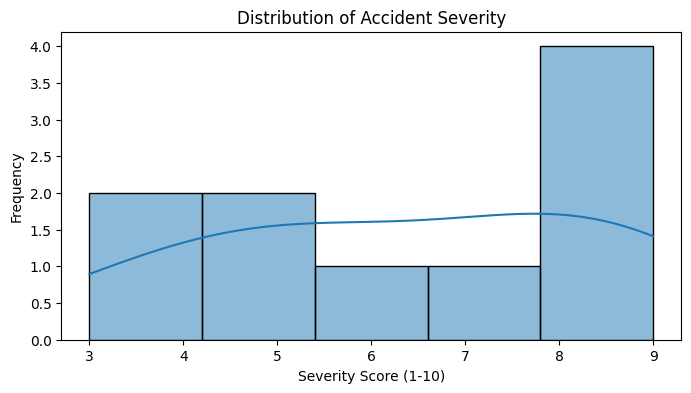

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Severity'], bins=5, kde=True)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Score (1-10)')
plt.ylabel('Frequency')
plt.show()

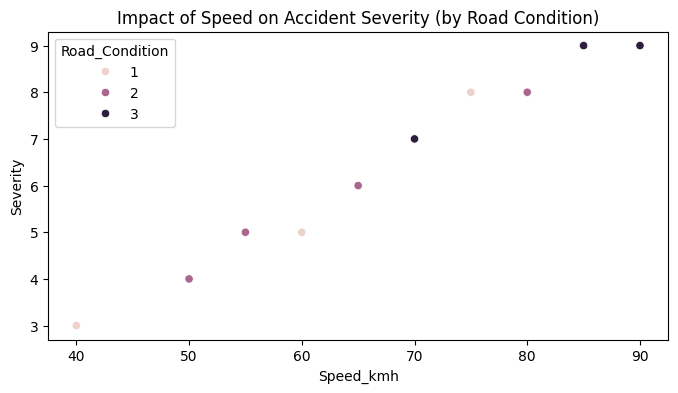

In [11]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Speed_kmh', y='Severity', data=df, hue='Road_Condition')
plt.title('Impact of Speed on Accident Severity (by Road Condition)')
plt.show()

In [13]:
# Independent variables (X) and dependent variable (y)
X = df[['Speed_kmh', 'Road_Condition', 'Weather']]
y = df['Severity']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R² Score: 0.9638548169062886
Mean Squared Error (MSE): 0.08132666196085057


In [19]:
joblib.dump(model, 'accident_severity_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [20]:
# Hypothetical new data: [Speed=75km/h, Road_Condition=2 (Average), Weather=1 (Rainy)]
new_data = [[75, 2, 1]]
predicted_severity = model.predict(new_data)
print("Predicted Severity:", predicted_severity[0])

Predicted Severity: 7.454800673778777


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
